In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常

In [1]:
import igraph as ig

### 1、生成简单图或一些复杂的经典图

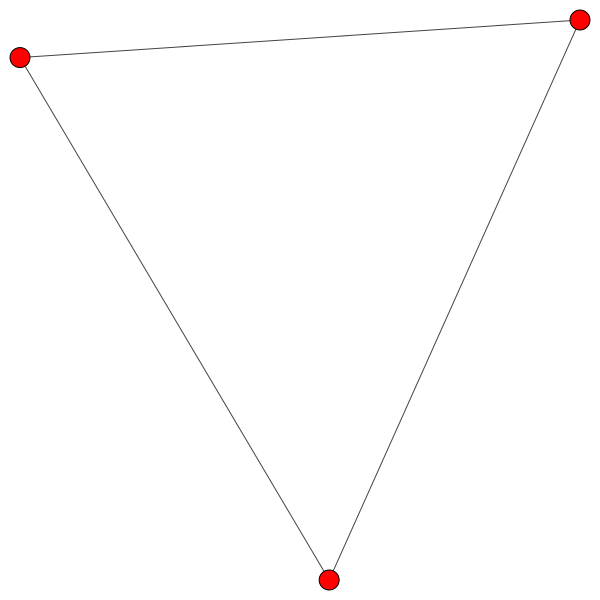

In [2]:
# 创建一个空图
g = ig.Graph()
# 增加节点和连边
g.add_vertices(3) # 增加三个节点0，1，2
g.add_edges([(0,1), (0,2), (1,2)])
ig.plot(g)

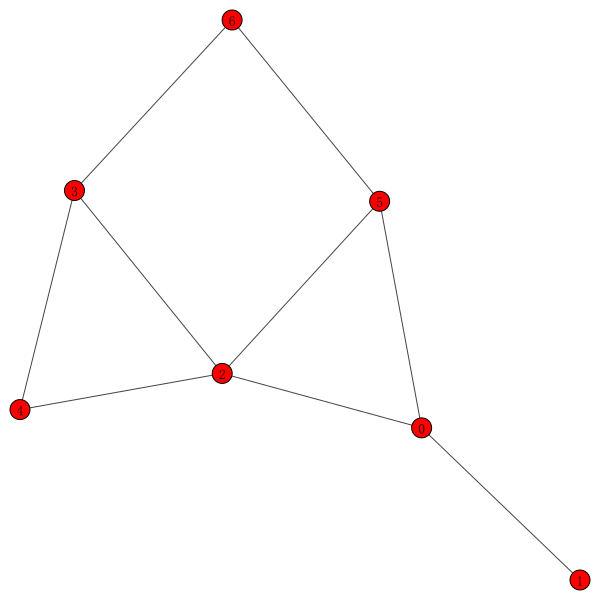

In [3]:
# 或者
g2 = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
# 设置标签
g2.vs["label"] = range(len(g2.vs))
ig.plot(g2)

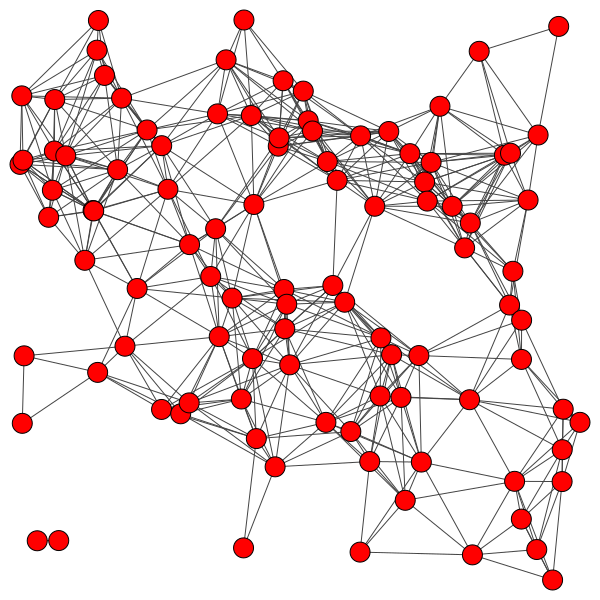

In [4]:
# 生成库中自带的网络
g = ig.Graph.GRG(100, 0.2)
ig.plot(g)

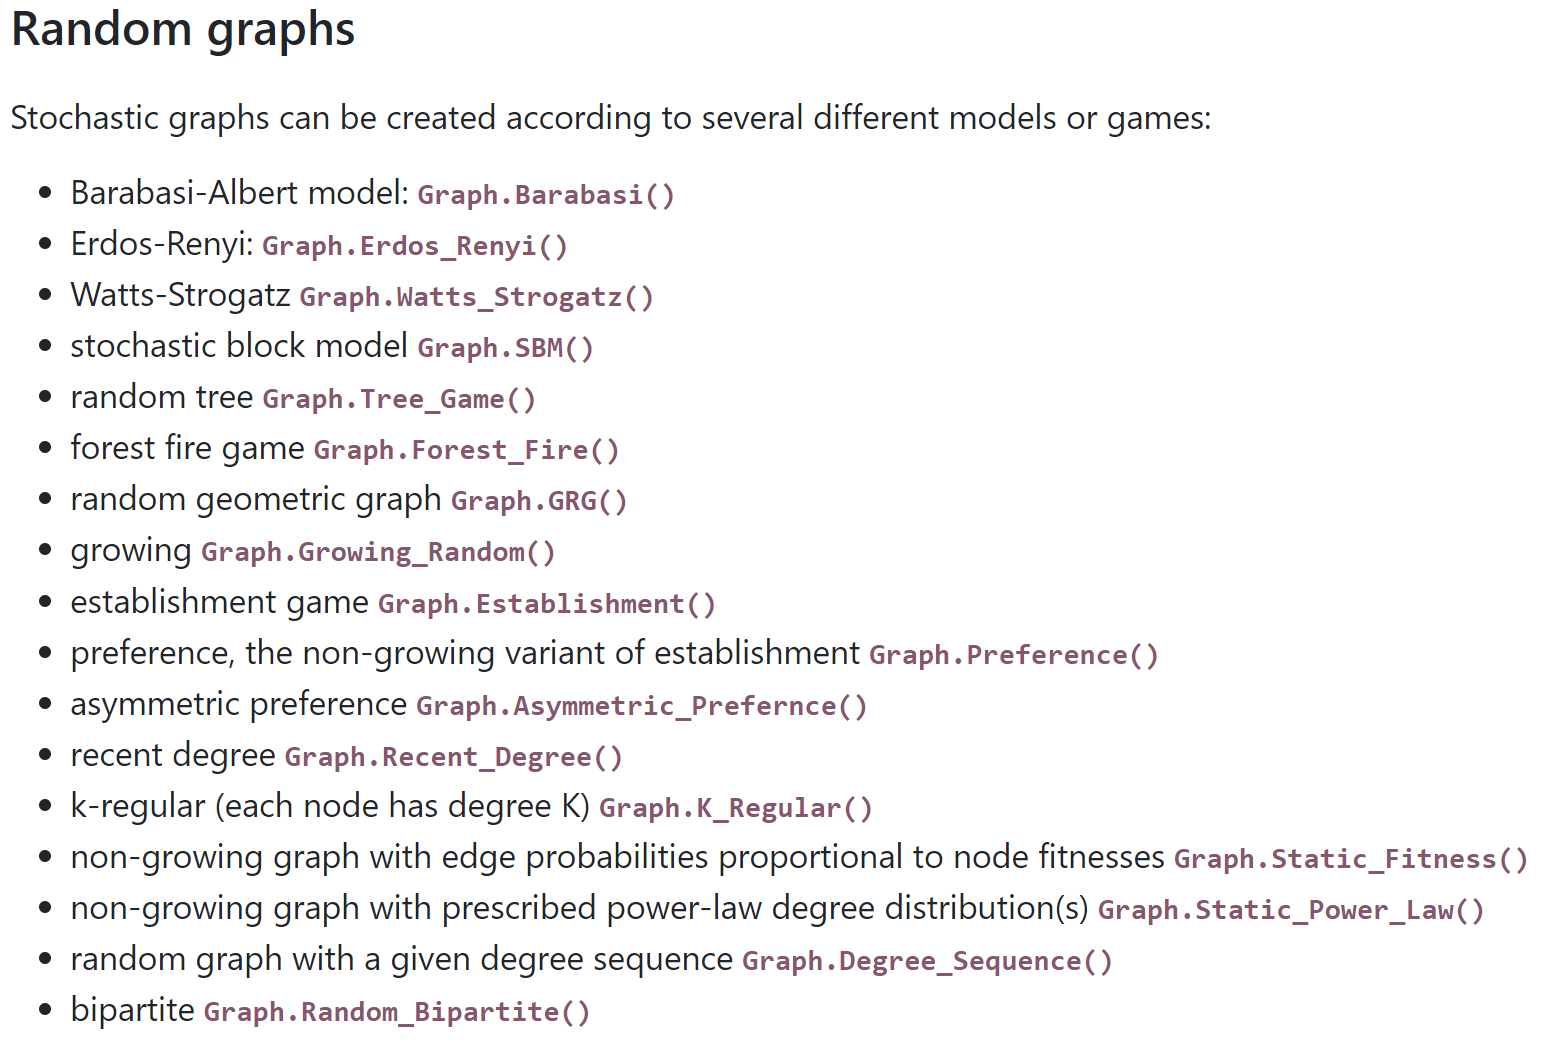

In [5]:
# 以及其他经典图
g = ig.Graph.Full(n=3)
g = ig.Graph.Lattice(dim=[3, 3], circular=False)
g = ig.Graph.Ring(n=4, circular=False)
g = ig.Graph.Famous('Zachary')
# 更多的经典图生成函数见下图
from IPython.display import Image
Image(filename = './1.png', width=600, height=400)

In [6]:
# 也可将networkx(或graph-tool)格式的图转化为igraph的格式
import networkx as nx

G = nx.karate_club_graph()
g = ig.Graph.from_networkx(G)

### 2、计算网络的基本结构指标

In [7]:
# 获取节点和连边数量
n = g.vcount()
m = g.ecount()
print(n, m)

34 78


In [8]:
# 遍历节点和连边
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
for v in g.vs:
    print(v)
# for e in g.es:
#     print(e.tuple)
g.get_edgelist()

igraph.Vertex(<igraph.Graph object at 0x000001FE888076D0>, 0, {})
igraph.Vertex(<igraph.Graph object at 0x000001FE888076D0>, 1, {})
igraph.Vertex(<igraph.Graph object at 0x000001FE888076D0>, 2, {})
igraph.Vertex(<igraph.Graph object at 0x000001FE888076D0>, 3, {})
igraph.Vertex(<igraph.Graph object at 0x000001FE888076D0>, 4, {})
igraph.Vertex(<igraph.Graph object at 0x000001FE888076D0>, 5, {})
igraph.Vertex(<igraph.Graph object at 0x000001FE888076D0>, 6, {})


[(0, 1), (0, 2), (2, 3), (3, 4), (2, 4), (2, 5), (0, 5), (3, 6), (5, 6)]

In [9]:
# 获取所有节点的度
g.degree()

[3, 1, 4, 3, 2, 3, 2]

In [10]:
# 获取邻接矩阵
g.get_adjacency()

Matrix([[0, 1, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0]])

In [11]:
# 关联系数
g.assortativity_degree()

-0.18867924528301827

In [12]:
# 获取介数
print(g.betweenness())
# 遍历
for i, bet in enumerate(g.betweenness()):
    print(i, bet)

[5.0, 0.0, 5.5, 1.5, 0.0, 2.5, 0.5]
0 5.0
1 0.0
2 5.5
3 1.5
4 0.0
5 2.5
6 0.5


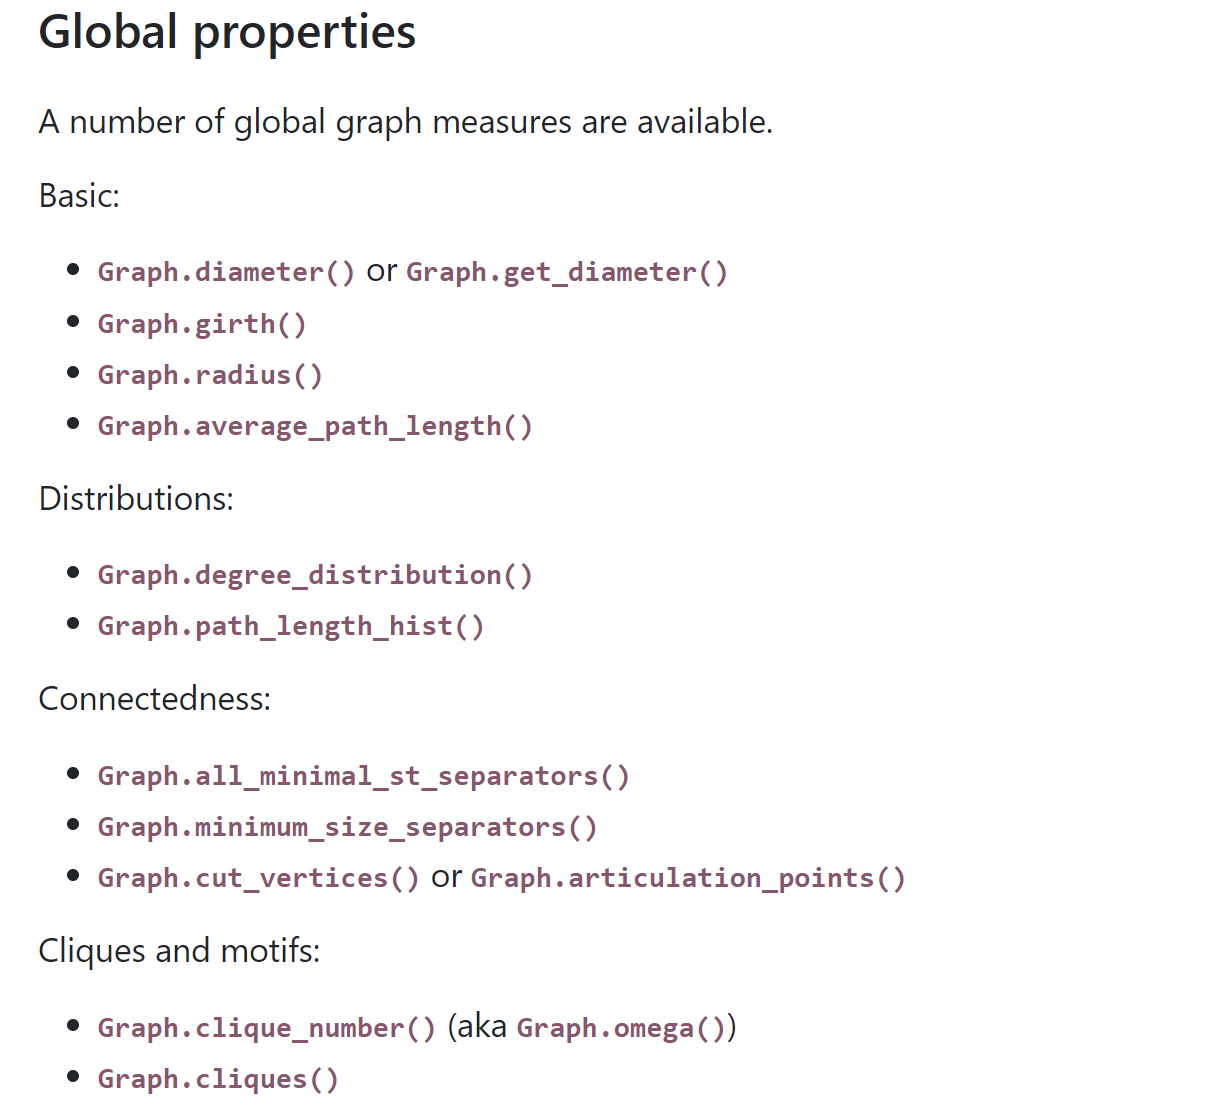

In [13]:
# 以及接近度、特征向量中心性等
# g.closeness()
# g.eigenvector_centrality()
# g.pagerank()
# g.diameter() 

# 更多特征计算见：https://igraph.org/python/tutorial/latest/analysis.html
Image(filename = './2.png', width=600, height=600)

In [14]:
# 网络可视化功能见：https://igraph.org/python/tutorial/latest/visualisation.html

### 3、以计算网络的平均最短路径长度为例，比较igraph和NetworkX的计算速度

In [18]:
import pandas as pd
import time

In [20]:
# 这里用networkx加载两个真实数据集进行测试，也可使用igraph加载（方式会发生变化）
df1 = pd.read_csv("power.csv")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using = nx.Graph())
print("G1的节点数量和连边数量分别为：", len(G1.nodes()), len(G1.edges()))

df2 = pd.read_csv("citation.csv")
G2 = nx.from_pandas_edgelist(df2, 'source', 'target', create_using = nx.Graph())
print("G2的节点数量和连边数量分别为：", len(G2.nodes()), len(G2.edges()))

print(nx.is_connected(G1), nx.is_connected(G2))

G1的节点数量和连边数量分别为： 4941 6594
G2的节点数量和连边数量分别为： 23133 93497
True False


In [21]:
# 由于G2不连通，故考虑其最大连通子图
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
LCC_G2 = G2.subgraph(Gcc[0])
print("LCC_G2的节点数量和连边数量分别为：", len(LCC_G2.nodes()), len(LCC_G2.edges()))

LCC_G2的节点数量和连边数量分别为： 21363 91342


In [17]:
g1 = ig.Graph.from_networkx(G1)
g2 = ig.Graph.from_networkx(LCC_G2)

In [31]:
# 比较计算直径的速度
t1 = time.perf_counter()
Dmax1 = nx.diameter(G1)
t2 = time.perf_counter()
print(Dmax1)
print("networkx下计算G1直径所用时间为{}秒".format(t2-t1))

46
networkx下计算G1直径所用时间为24.317205900000317秒


In [32]:
t1 = time.perf_counter()
Dmax1 = g1.diameter() 
t2 = time.perf_counter()
print(Dmax1)
print("igraph下计算G1直径所用时间为{}秒".format(t2-t1))

46
igraph下计算G1直径所用时间为0.732682300000306秒


In [28]:
# 比较计算G1平均最短路径长度的速度
t1 = time.perf_counter()
aspl_nx = nx.average_shortest_path_length(G1)
t2 = time.perf_counter()
print(aspl_nx)
print("networkx下计算G1平均最短路径长度所用时间为{}秒".format(t2-t1))

t3 = time.perf_counter()
aspl_ig = g1.average_path_length()
t4 = time.perf_counter()
print(aspl_ig)
print("igraph下计算G1平均最短路径长度所用时间为{}秒".format(t4-t3))

18.989185424445708
networkx下计算G1平均最短路径长度所用时间为25.013749099999814秒
18.989185424445708
igraph下计算G1平均最短路径长度所用时间为0.7367530000001352秒


In [ ]:
# 比较计算LCC_G2平均最短路径长度的速度
t11 = time.perf_counter()
aspl_nx = nx.average_shortest_path_length(LCC_G2)
t22 = time.perf_counter()
print(aspl_nx)
print("networkx下计算LCC_G2平均最短路径长度所用时间为{}秒".format(t22-t11))
# 运行很久（可以跳过）

In [30]:
t33 = time.perf_counter()
aspl_ig = g2.average_path_length()
t44 = time.perf_counter()
print(aspl_ig)
print("igraph下计算LCC_G2平均最短路径长度所用时间为{}秒".format(t44-t33))

5.3521018968755385
igraph下计算LCC_G2平均最短路径长度所用时间为16.962734499999897秒
